#Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings

warnings.filterwarnings('ignore')


# Data Loading


In [4]:
train=pd.read_csv("train_dataset_final1.csv")
validate = pd.read_csv('validate_dataset_final.csv')

In [5]:
print(f"Train set shape: {train.shape}")
print(f"Validation set shape: {validate.shape}")

Train set shape: (25247, 27)
Validation set shape: (5016, 26)


In [6]:
train.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

**We can clearly observe that age column must have some missing values.**

In [8]:
print(train.isnull().sum())

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64


In [9]:
train.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


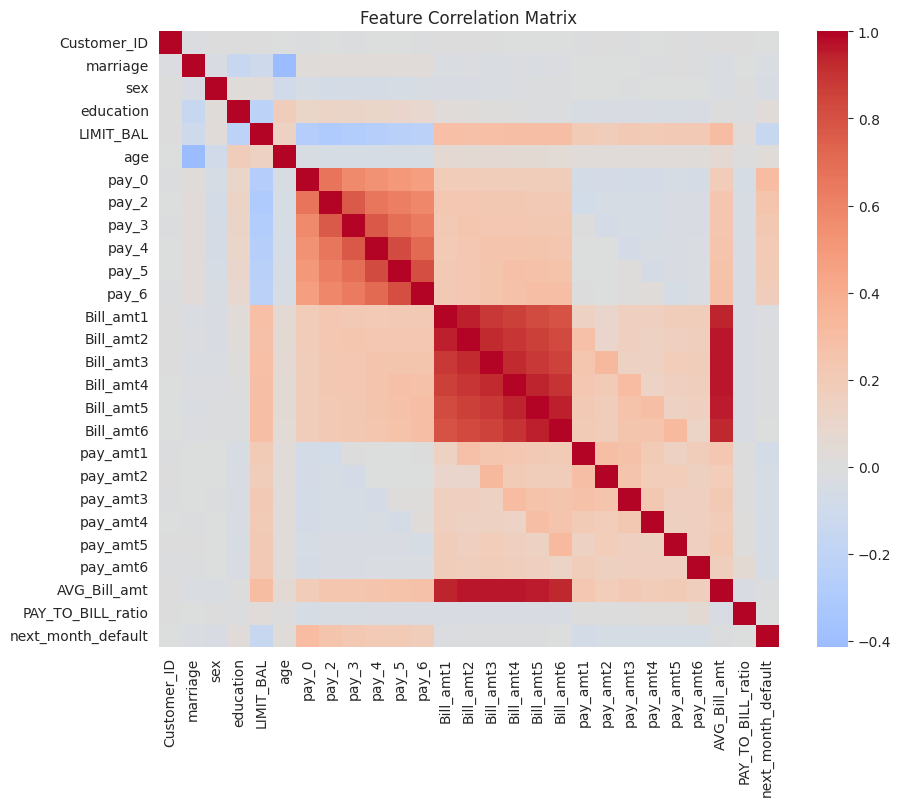

In [10]:
plt.figure(figsize=(10,8))
corr = train.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()


In [11]:
median_age=train['age'].median()
train.fillna({'age':median_age},inplace=True)

In [12]:
print(train['age'].isnull().sum())

0


In [13]:
train['marriage'].unique()

array([2, 1, 3, 0])

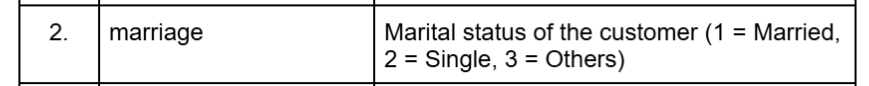

In [14]:
train['marriage'] = train['marriage'].replace(0, 3)
print(train['marriage'].unique())

[2 1 3]


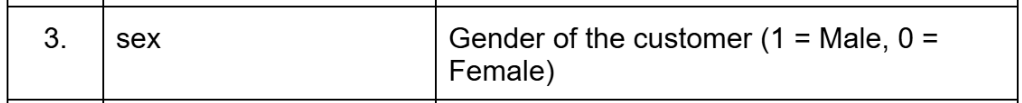

In [15]:
train['sex'].unique()

array([0, 1])

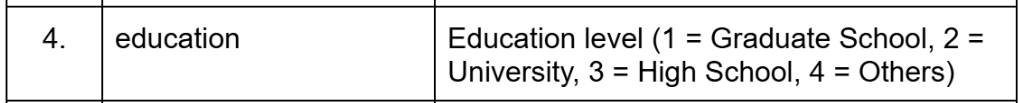

In [16]:
train['education'].unique()

array([2, 1, 3, 4, 5, 6, 0])

In [17]:
train['education'] = train['education'].replace([0, 5, 6], 4)
print(train['education'].unique())

[2 1 3 4]


In [18]:
train.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [20]:
# df.head()

# **EDA**

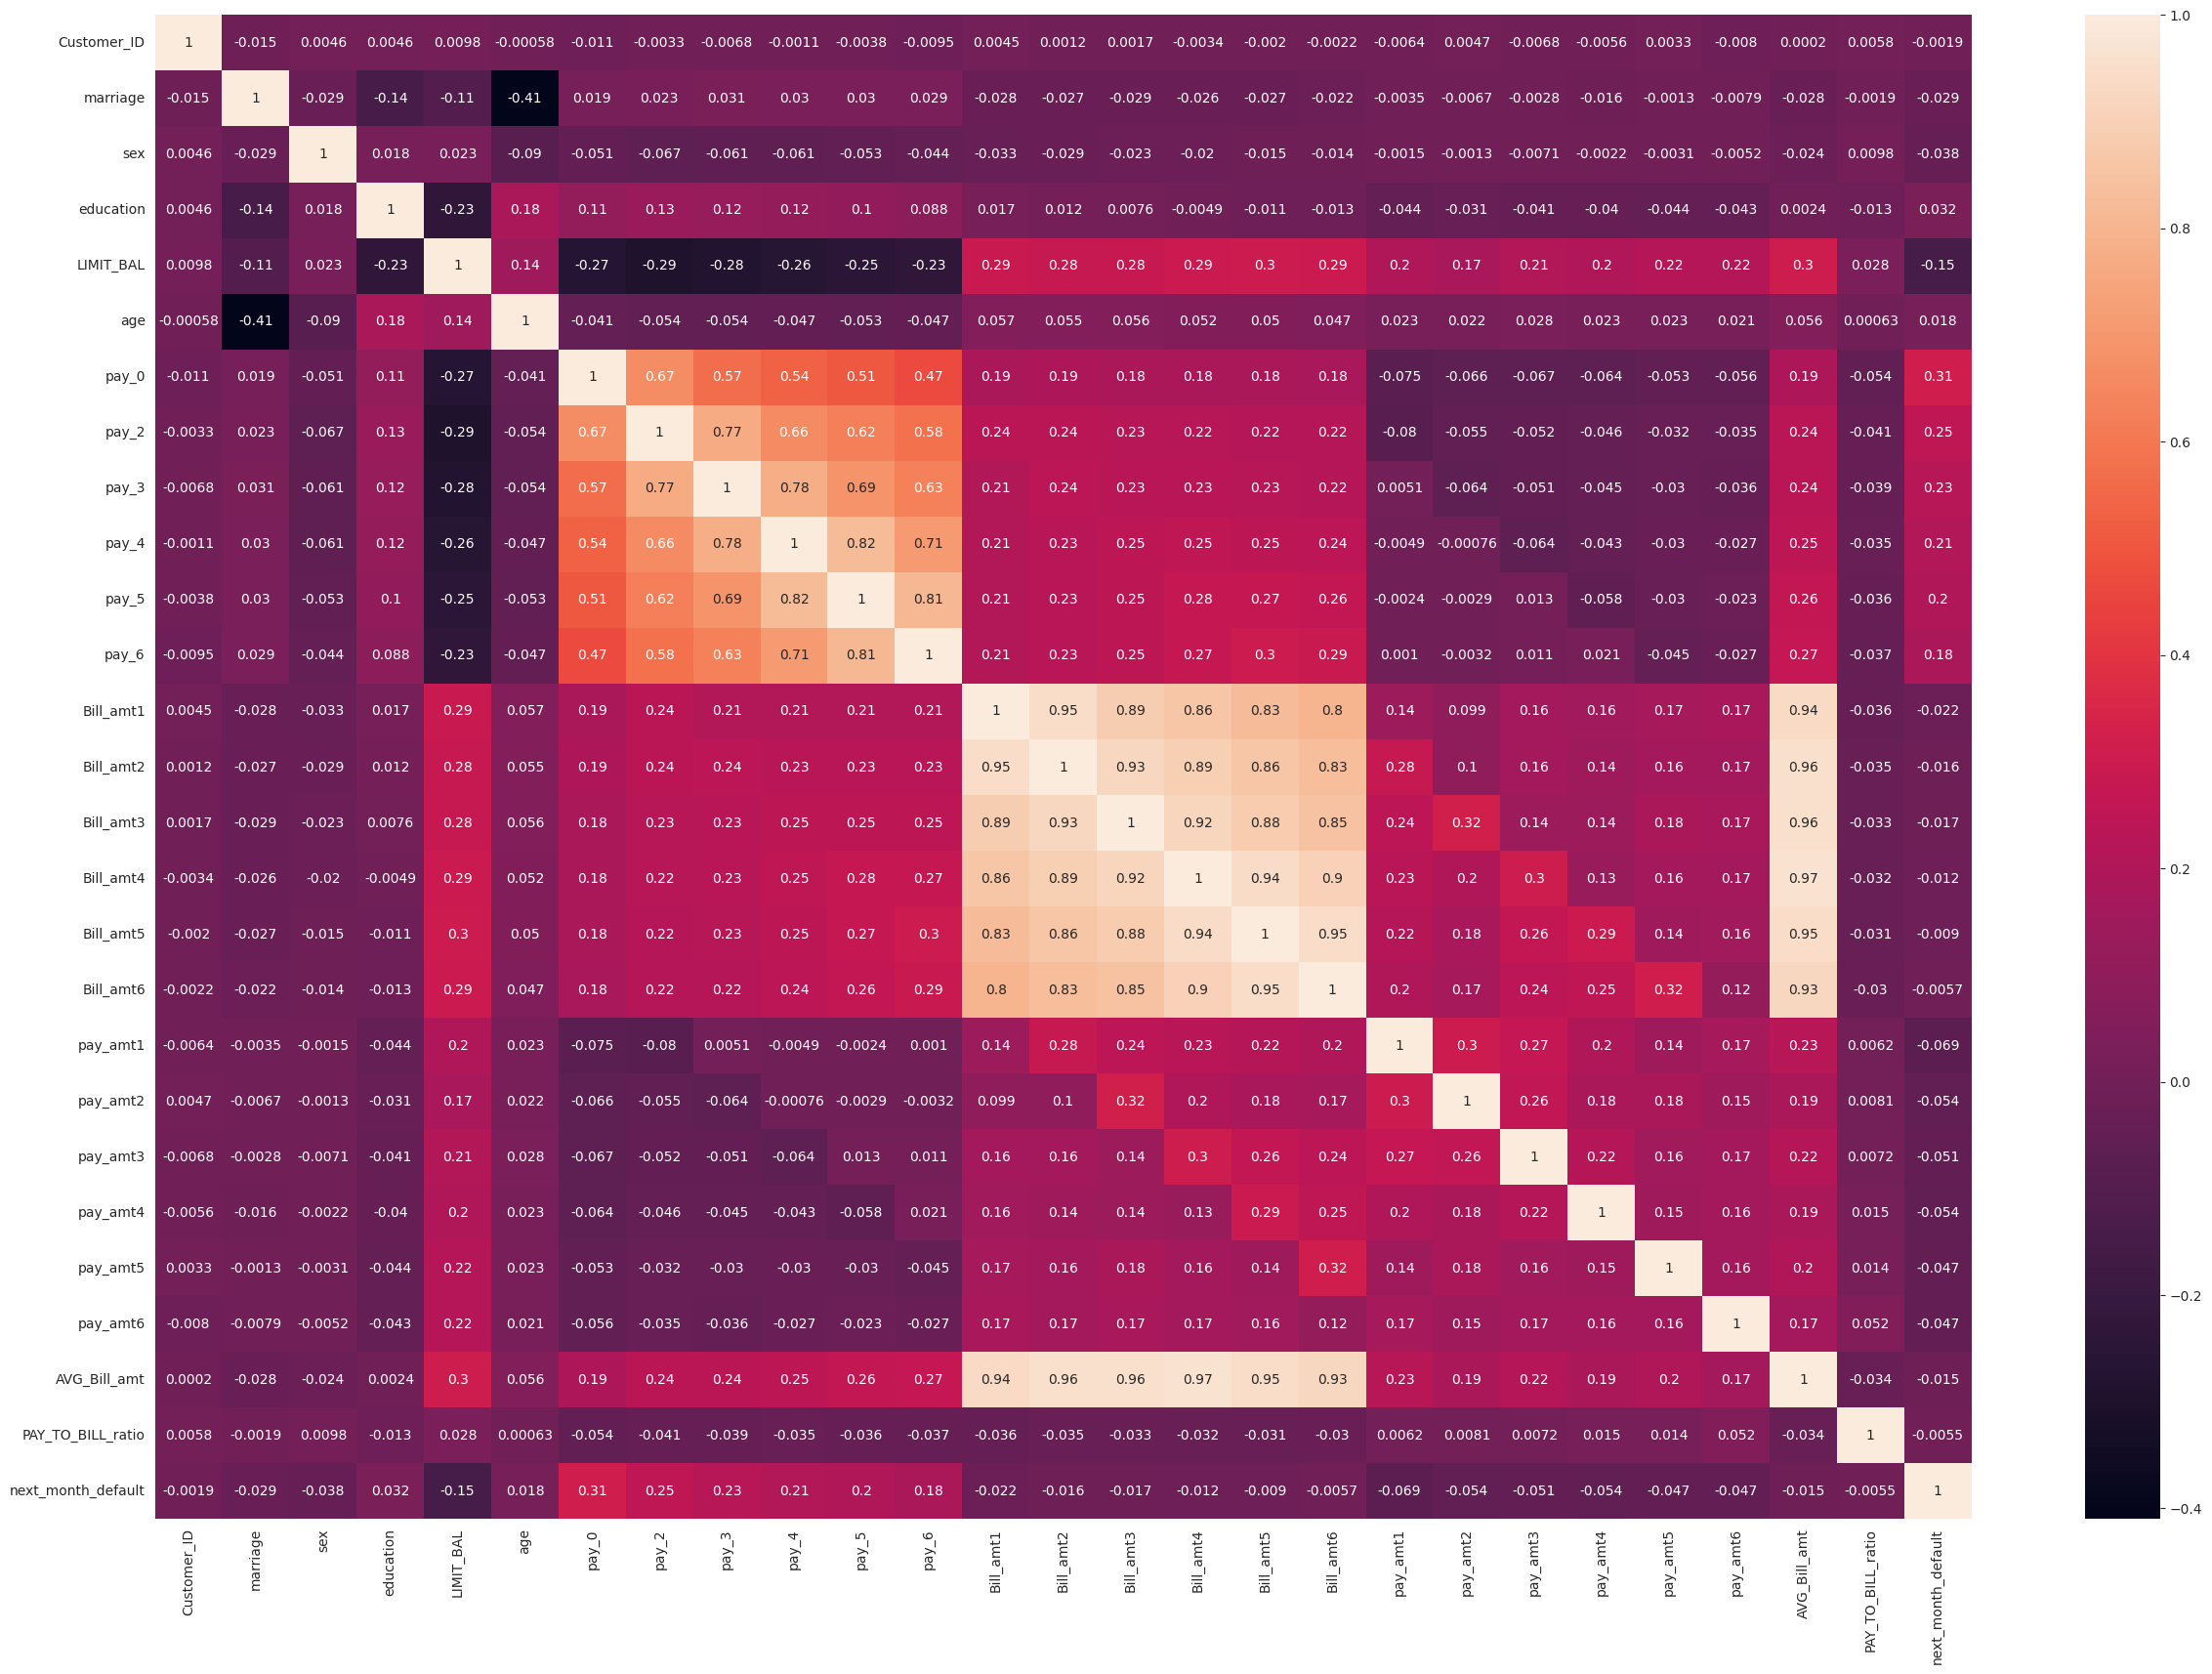

In [21]:
plt.subplots(figsize=(30,20))
sns.heatmap(train.corr(), annot=True)
plt.show()

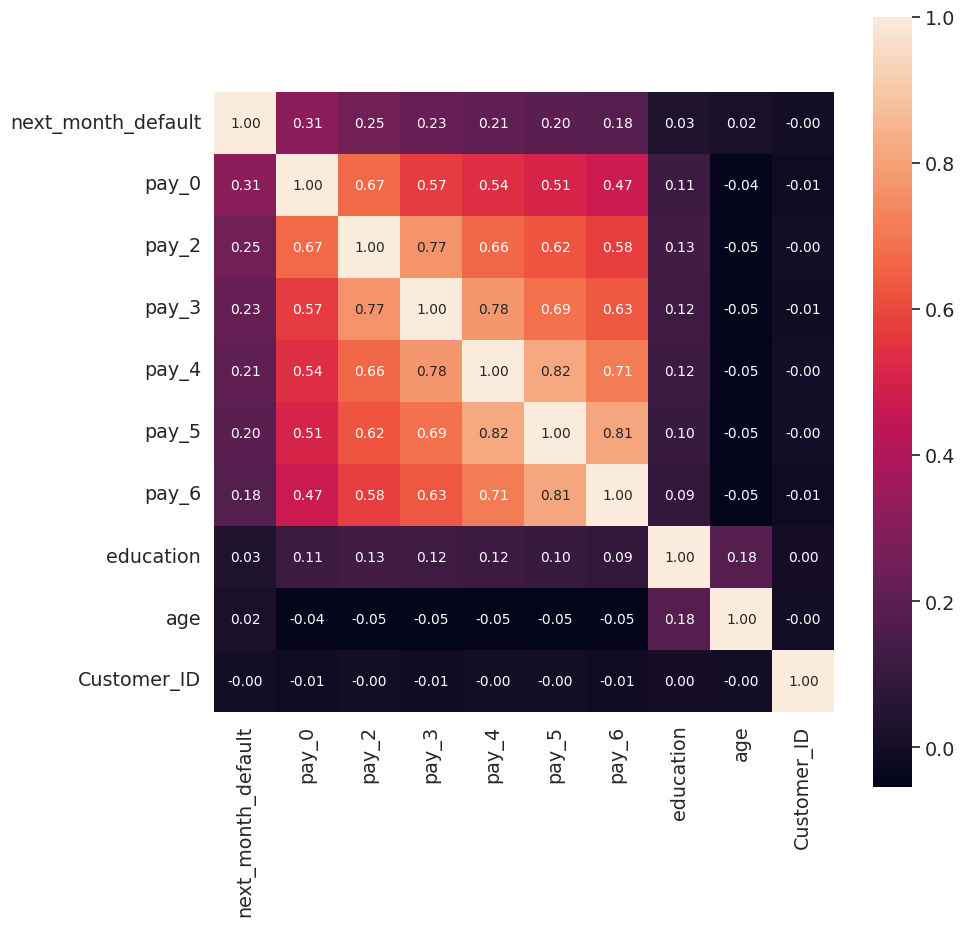

In [22]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, 'next_month_default')['next_month_default'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

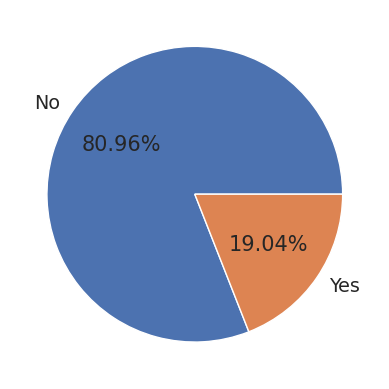

In [23]:
inter=train['next_month_default'].value_counts()
plt.pie(inter,labels=['No','Yes'],autopct='%0.2f%%',radius=1);

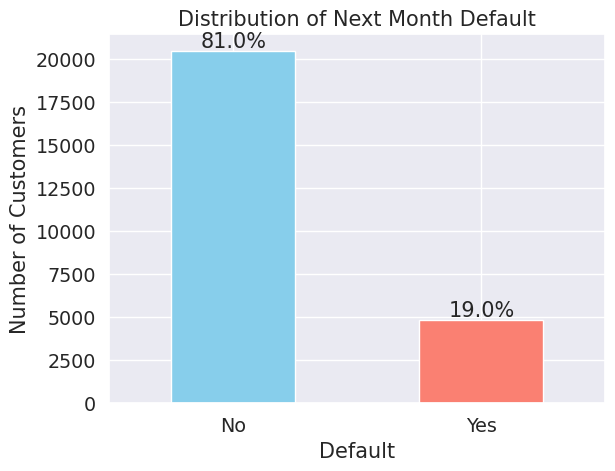

In [24]:
inter = train['next_month_default'].value_counts()
colors = ['skyblue', 'salmon']

fig, ax = plt.subplots()


inter.plot(kind='bar', color=colors, ax=ax)

plt.title('Distribution of Next Month Default')
plt.xlabel('Default')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

total = inter.sum()

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

We can see that the dataset consists of 81% clients are not expected to default payment whereas 19% clients are expected to default the payment.

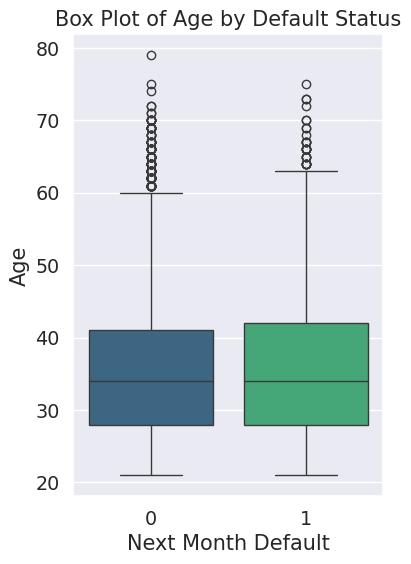

In [25]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=train, x='next_month_default', y='age', hue='next_month_default', palette='viridis', legend=False)
plt.title('Box Plot of Age by Default Status')
plt.xlabel('Next Month Default')
plt.ylabel('Age')
plt.show()

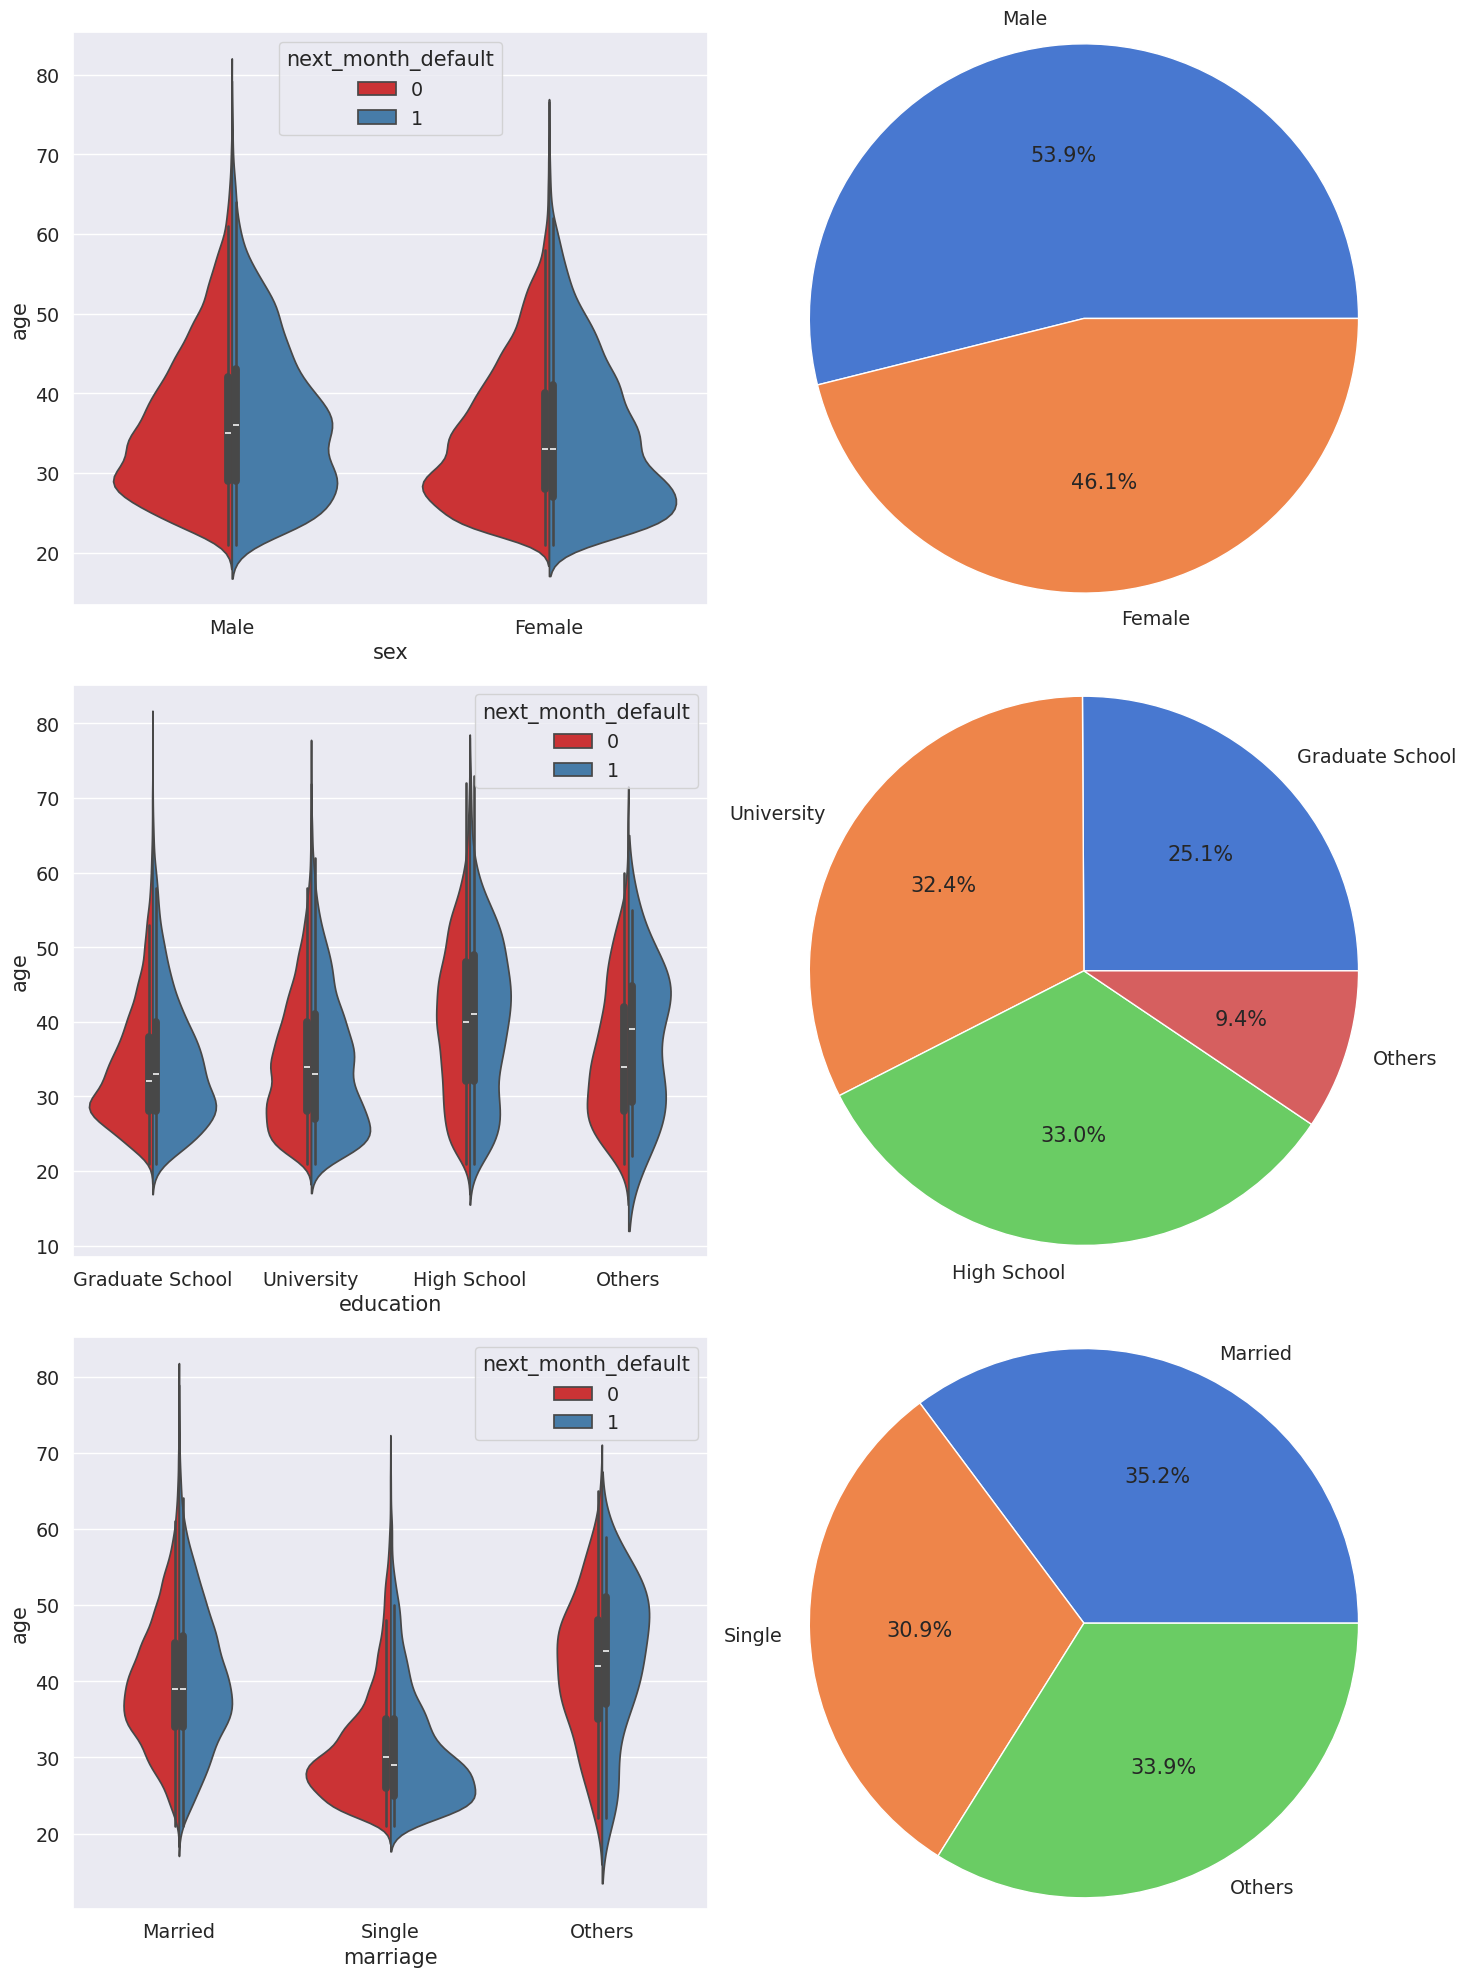

In [26]:
labels={"sex":{1:"Male",0:"Female"},
        "education":{1:"Graduate School",2:"University",3:"High School",4:"Others"},
        "marriage":{1:"Married",2:"Single",3:"Others"}}

fig,axes=plt.subplots(3,2,figsize=(15,20))
cols=['sex', 'education', 'marriage']

for i,col in enumerate(cols):
    inter=train.groupby(col)['next_month_default'].mean()

    sns.violinplot(x=col,y="age", hue="next_month_default",split=True, data=train,ax=axes[i,0], palette='Set1'  );
    axes[i,0].set_xticklabels(labels=labels[col].values())
    axes[i,1].pie(inter,labels=labels[col].values(),autopct='%0.1f%%',radius=1.2, colors=sns.color_palette('muted')[0:len(inter)]);

plt.tight_layout()

1. Men are more susceptible to defaulting than women as can be seen from data 53.9%(male) against 46.1%(female).
2. Single person has lower defaulting ratio in comparison to married,divorced,live-in person as they have less expenses and not responsible for family,children.




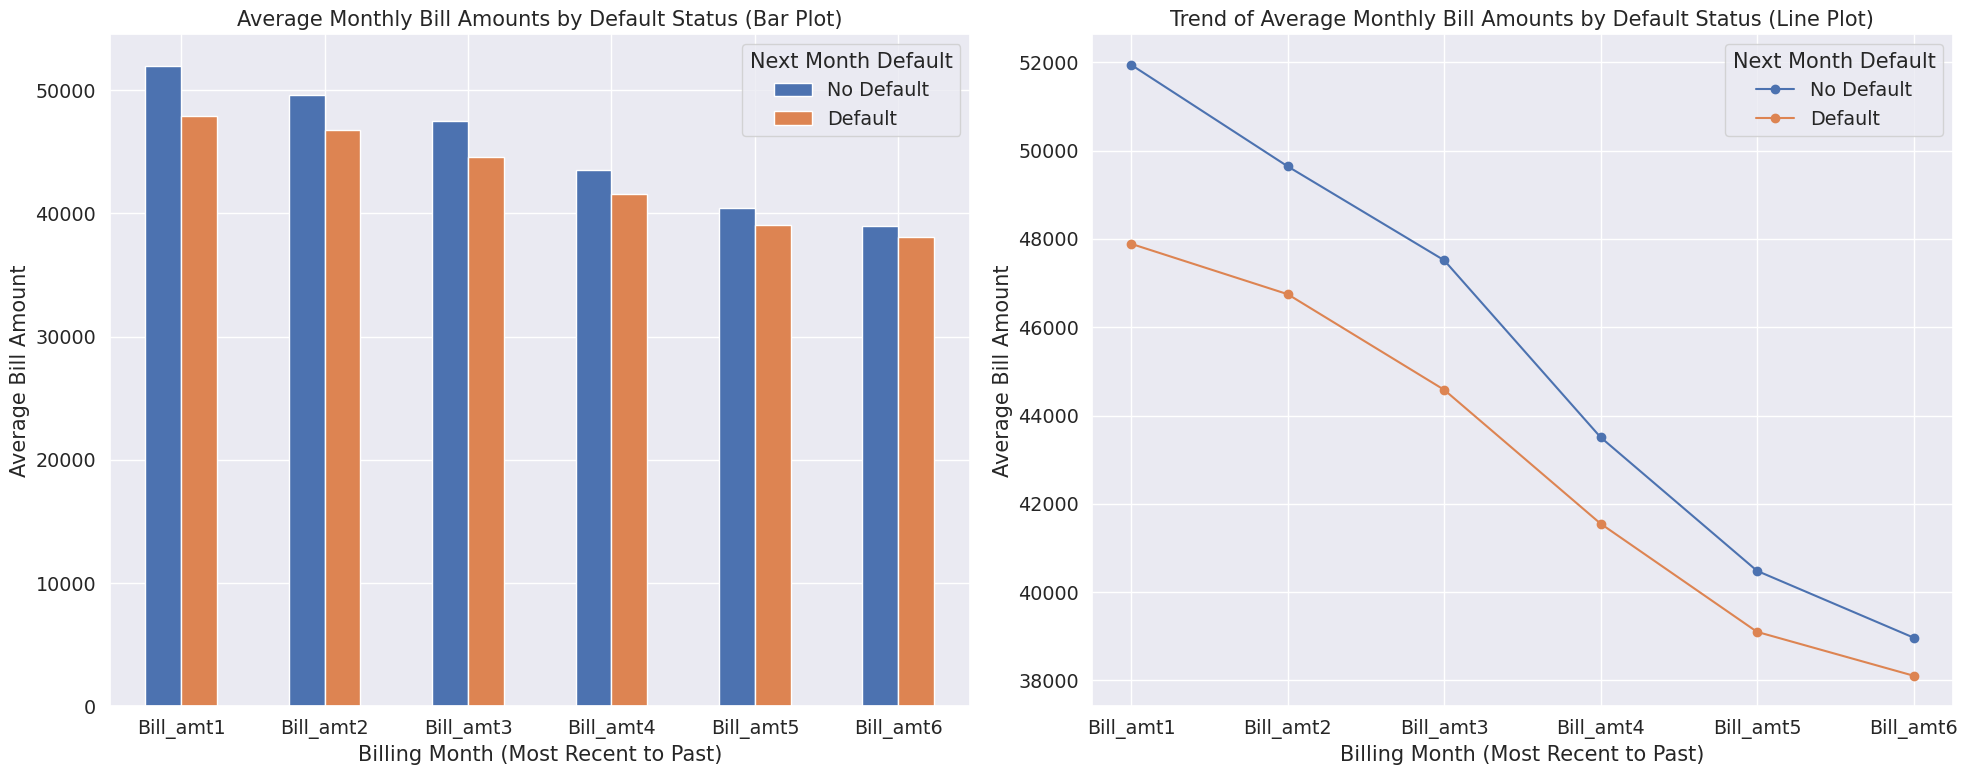

In [27]:
monthly_bill_avg = train.groupby('next_month_default')[['Bill_amt1','Bill_amt2','Bill_amt3','Bill_amt4','Bill_amt5','Bill_amt6']].mean().T

monthly_bill_avg.columns = ['No Default', 'Default']

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

monthly_bill_avg.plot(kind='bar', ax=axes[0], rot=0)
axes[0].set_title('Average Monthly Bill Amounts by Default Status (Bar Plot)')
axes[0].set_xlabel('Billing Month (Most Recent to Past)')
axes[0].set_ylabel('Average Bill Amount')
axes[0].set_xticks(ticks=range(len(monthly_bill_avg.index)), labels=['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6'])
axes[0].legend(title='Next Month Default')

monthly_bill_avg.plot(kind='line', ax=axes[1], marker='o')
axes[1].set_title('Trend of Average Monthly Bill Amounts by Default Status (Line Plot)')
axes[1].set_xlabel('Billing Month (Most Recent to Past)')
axes[1].set_ylabel('Average Bill Amount')
axes[1].set_xticks(ticks=range(len(monthly_bill_avg.index)), labels=['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']) # Ensure x-axis labels are consistent
axes[1].legend(title='Next Month Default')
axes[1].grid(True)

plt.tight_layout()
plt.show()

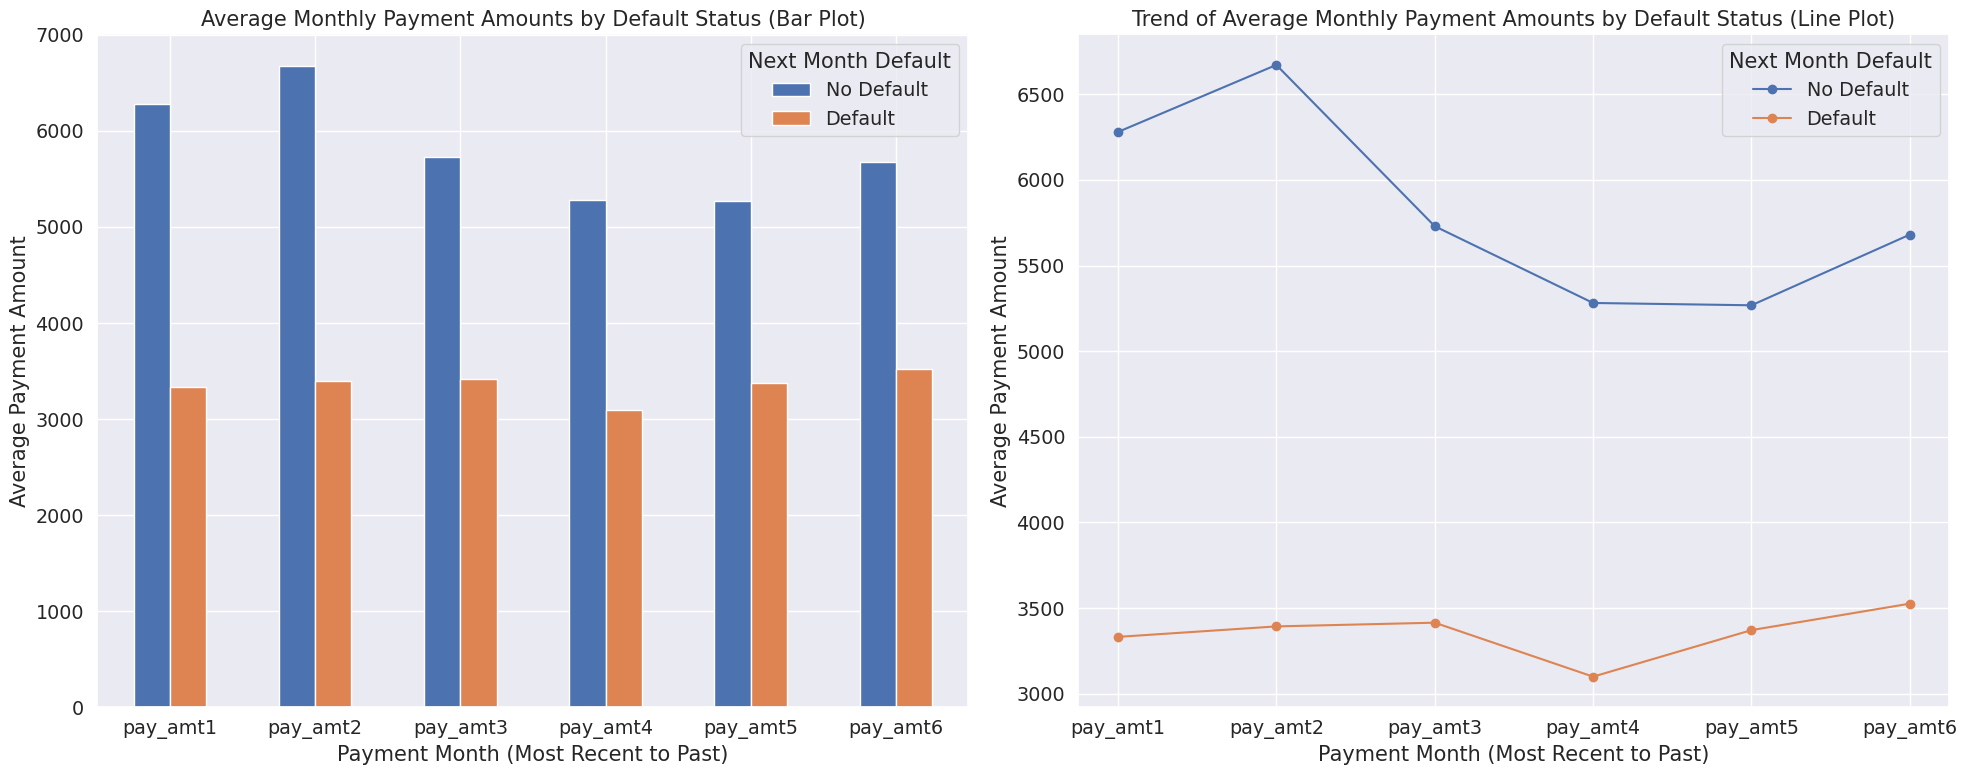

In [28]:
monthly_payamt = train.groupby('next_month_default')[['pay_amt1','pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].mean().T

monthly_payamt.columns = ['No Default', 'Default']

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

monthly_payamt.plot(kind='bar', ax=axes[0], rot=0)
axes[0].set_title('Average Monthly Payment Amounts by Default Status (Bar Plot)')
axes[0].set_xlabel('Payment Month (Most Recent to Past)')
axes[0].set_ylabel('Average Payment Amount')
axes[0].set_xticks(ticks=range(len(monthly_payamt.index)), labels=['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'])
axes[0].legend(title='Next Month Default')

monthly_payamt.plot(kind='line', ax=axes[1], marker='o')
axes[1].set_title('Trend of Average Monthly Payment Amounts by Default Status (Line Plot)')
axes[1].set_xlabel('Payment Month (Most Recent to Past)')
axes[1].set_ylabel('Average Payment Amount')
axes[1].set_xticks(ticks=range(len(monthly_payamt.index)), labels=['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'])
axes[1].legend(title='Next Month Default')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Feature Engineering


In [29]:
train.shape

(25247, 27)

In [30]:
X = train.drop(['next_month_default', 'Customer_ID'], axis=1)
y = train['next_month_default']

                        mean       50%
next_month_default                    
0                   0.351513  0.243935
1                   0.450893  0.466653


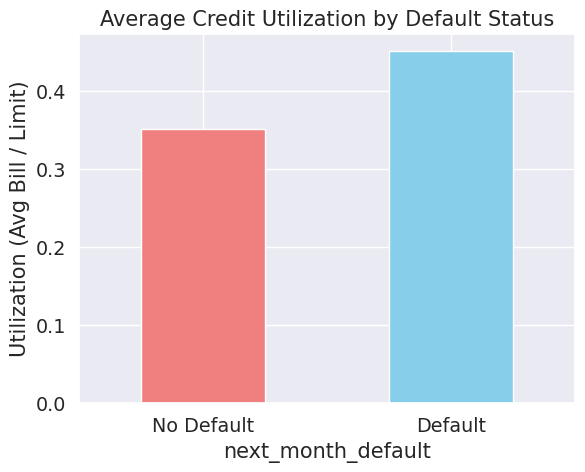

In [31]:
train['credit_utilization'] = train['AVG_Bill_amt'] / train['LIMIT_BAL']

utilization_stats = train.groupby('next_month_default')['credit_utilization'].describe()
print(utilization_stats[['mean', '50%']])

mean_util = train.groupby('next_month_default')['credit_utilization'].mean()
mean_util.plot(kind='bar',color=['lightcoral', 'skyblue'])
plt.title("Average Credit Utilization by Default Status")
plt.ylabel("Utilization (Avg Bill / Limit)")
plt.xticks([0,1], ['No Default', 'Default'], rotation=0)
plt.show()


In [32]:
X['pay_mean'] = X[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].mean(axis=1)
X['Bill_amt_mean'] = X[['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']].mean(axis=1)
X['pay_amt_mean'] = X[['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].mean(axis=1)
X['credit_utilization'] = X['AVG_Bill_amt'] / X['LIMIT_BAL']


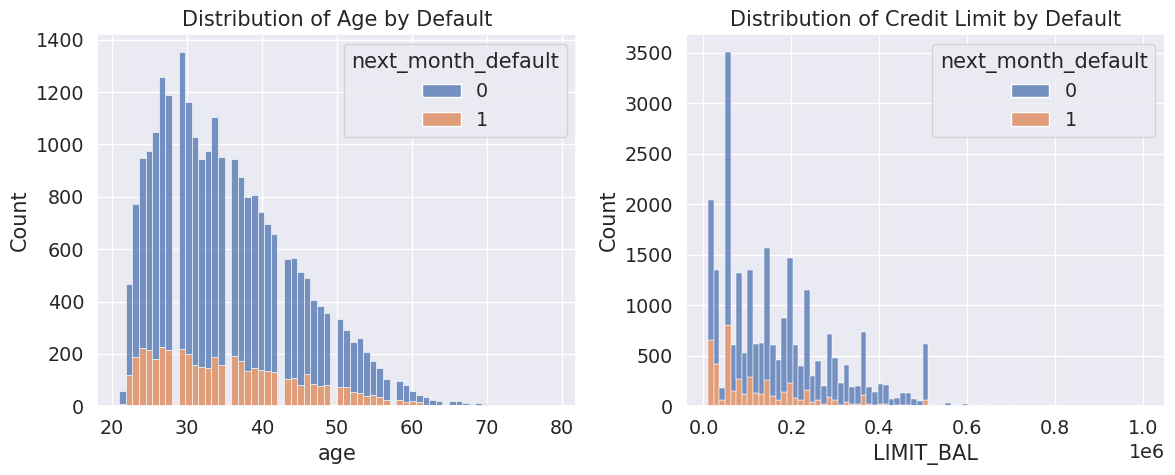

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(data=train, x='age', hue='next_month_default', multiple='stack', ax=axes[0])
axes[0].set_title('Distribution of Age by Default')
sns.histplot(data=train, x='LIMIT_BAL', hue='next_month_default', multiple='stack', ax=axes[1])
axes[1].set_title('Distribution of Credit Limit by Default')
plt.tight_layout()
plt.show()


# Handling Class Imbalance (SMOTE)



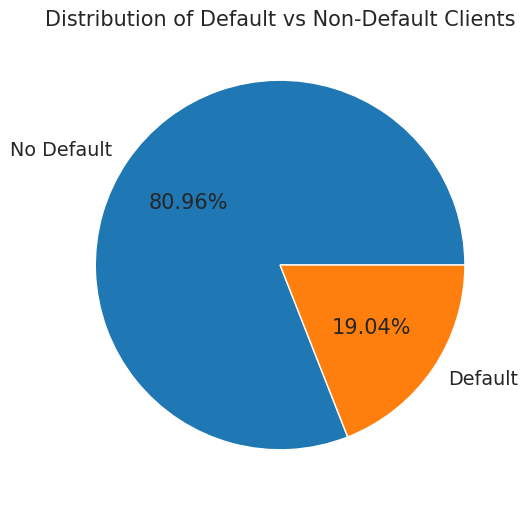

In [34]:
inter=train['next_month_default'].value_counts()
plt.figure(figsize=(6, 6)) # Increase figure size for better visibility
plt.pie(inter, labels=['No Default', 'Default'], autopct='%0.2f%%', radius=1, colors=['#1f77b4', '#ff7f0e']); # Use distinct colors
plt.title('Distribution of Default vs Non-Default Clients')
plt.show()

As the pie chart clearly illustrates, the dataset has a significant class imbalance. The majority of clients (No Default) make up a much larger proportion of the data than the minority class (Default). This imbalance can cause issues when training a machine learning model, as the model may become biased towards the majority class and perform poorly on the minority class (the one we are often most interested in predicting).

Text(0.5, 1.0, 'Distribution of Default vs Non-Default')

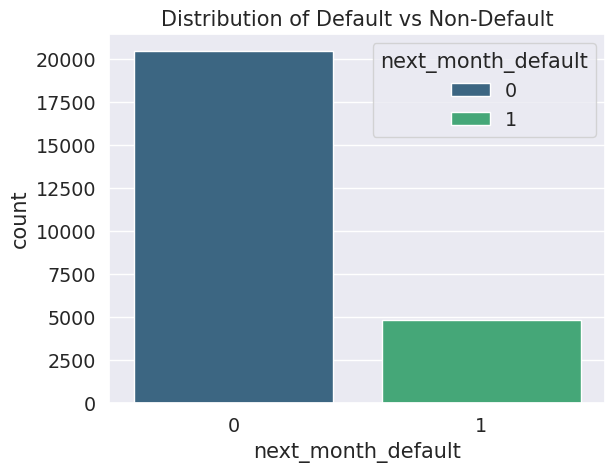

In [35]:
sns.countplot(data=train, x='next_month_default',hue='next_month_default', palette='viridis')
plt.title('Distribution of Default vs Non-Default')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state=42,
                                                   stratify=y)


In [37]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


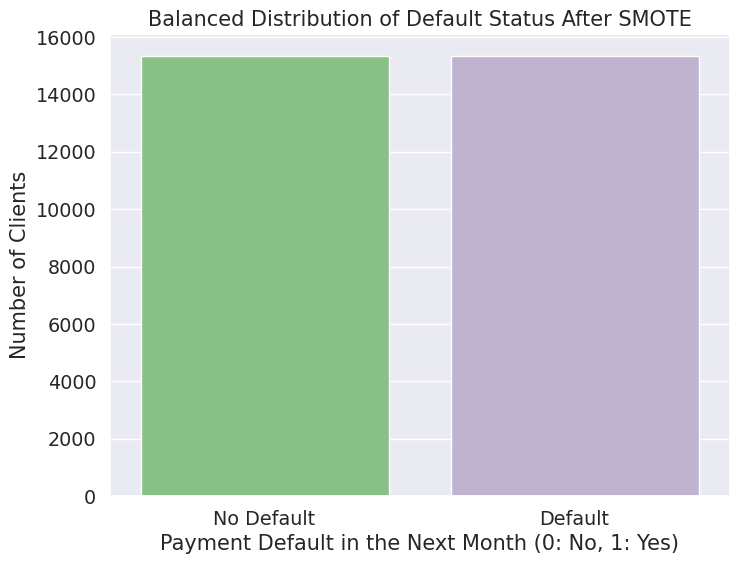

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled,hue=y_train_resampled, palette='Accent',legend=False)
plt.title('Balanced Distribution of Default Status After SMOTE')
plt.xlabel('Payment Default in the Next Month (0: No, 1: Yes)')
plt.ylabel('Number of Clients')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

In [41]:
print("Shape of original features:", X.shape)
print("Shape of resampled features:", X_train_resampled.shape)
print("Shape of original target:", y.shape)
print("Shape of resampled target:", y_train_resampled.shape)
print("Distribution of target variable after SMOTE:\n", y_train_resampled.value_counts())

Shape of original features: (25247, 29)
Shape of resampled features: (30660, 29)
Shape of original target: (25247,)
Shape of resampled target: (30660,)
Distribution of target variable after SMOTE:
 next_month_default
0    15330
1    15330
Name: count, dtype: int64


# **SCALING**

In [42]:
train.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,credit_utilization
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.558205,0.604111,1.840813,168342.060443,35.431022,-0.042857,-0.159544,-0.190359,-0.241415,...,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399,0.370435
std,7288.325459,0.521965,0.489050,0.749217,129892.784807,9.152635,1.099315,1.173990,1.172636,1.146753,...,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624,0.349451
min,5017.000000,1.000000,0.000000,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000,-0.200154
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000,0.029802
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000,0.280751
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000,0.682001
max,30263.000000,3.000000,1.000000,4.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000,3.759125


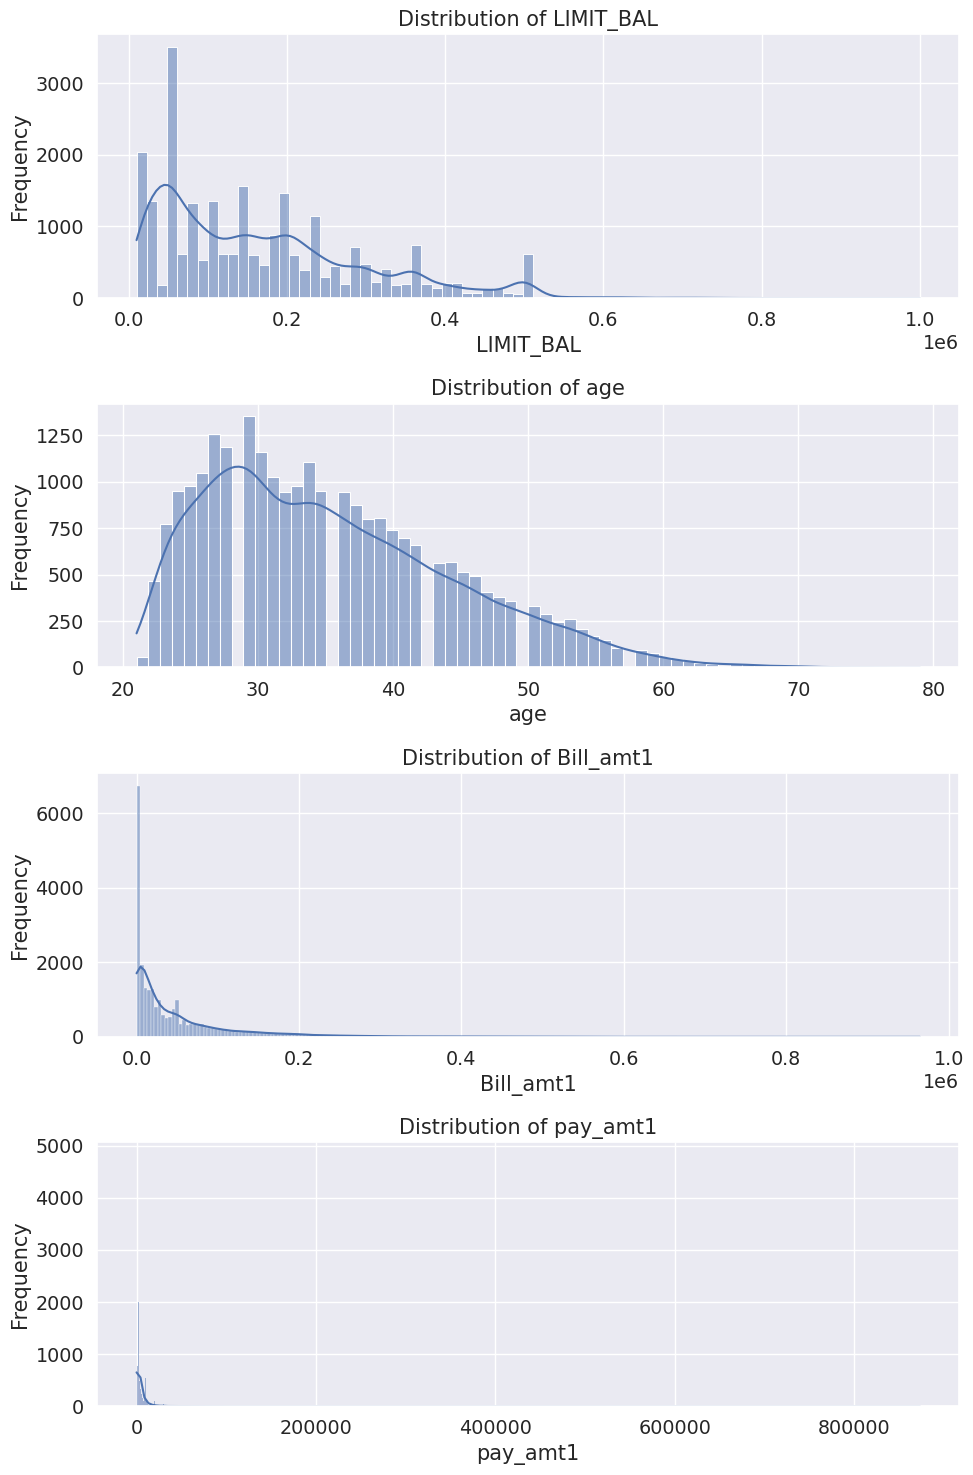

In [43]:
selected_features = ['LIMIT_BAL', 'age', 'Bill_amt1', 'pay_amt1']

fig, axes = plt.subplots(nrows=len(selected_features), figsize=(10, 15))

for i, col in enumerate(selected_features):
    sns.histplot(data=train, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

As we saw from the visual plots and summary statistics, the features in our dataset have vastly different scales. Features with larger value ranges can unfairly dominate the learning process of many machine learning algorithms.

Standardization, by transforming features to have a mean of 0 and a standard deviation of 1, ensures that all features contribute more equally to the model training, preventing features with larger magnitudes from having an outsized influence solely due to their scale. This step is crucial for improving the performance and reliability of our predictive models.

In [44]:
scaler = StandardScaler()

In [45]:
numerical_cols = X_train_resampled.columns
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled  = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=numerical_cols)
X_test  = pd.DataFrame(X_test_scaled,  columns=numerical_cols)
y_train = y_train_resampled


In [46]:
# numerical_cols = X_resampled.columns
# X_scaled = scaler.fit_transform(X_resampled)
# X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols)

#Model Comparison

In [47]:
print("\nData shapes after splitting:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("\nDistribution of target variable in training set:")
print(y_train.value_counts())

print("\nDistribution of target variable in test set:")
print(y_test.value_counts())


Data shapes after splitting:
X_train shape: (30660, 29)
y_train shape: (30660,)
X_test shape: (6312, 29)
y_test shape: (6312,)

Distribution of target variable in training set:
next_month_default
0    15330
1    15330
Name: count, dtype: int64

Distribution of target variable in test set:
next_month_default
0    5110
1    1202
Name: count, dtype: int64


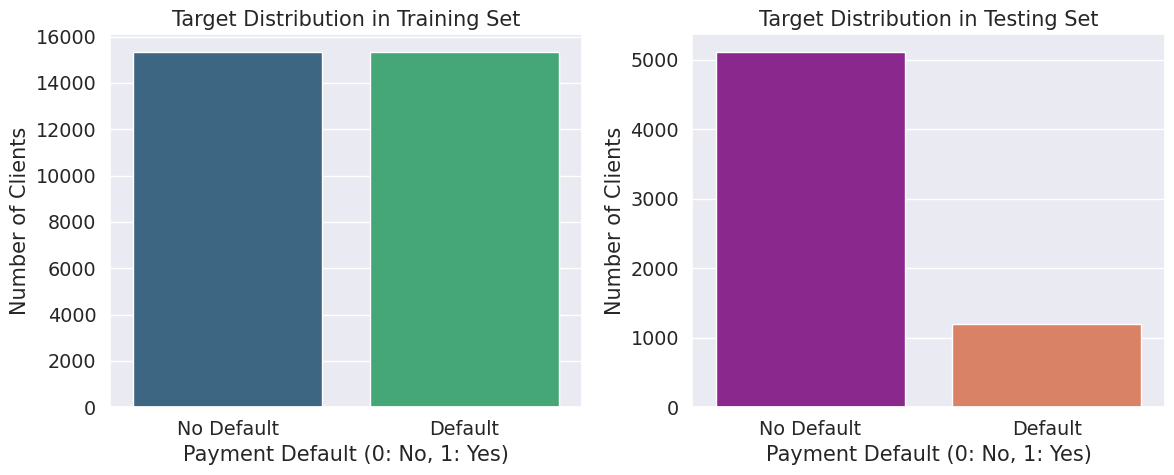

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y_train, ax=axes[0], palette='viridis')
axes[0].set_title('Target Distribution in Training Set')
axes[0].set_xlabel('Payment Default (0: No, 1: Yes)')
axes[0].set_ylabel('Number of Clients')
axes[0].set_xticks([0, 1], ['No Default', 'Default'])

sns.countplot(x=y_test, ax=axes[1], palette='plasma')
axes[1].set_title('Target Distribution in Testing Set')
axes[1].set_xlabel('Payment Default (0: No, 1: Yes)')
axes[1].set_ylabel('Number of Clients')
axes[1].set_xticks([0, 1], ['No Default', 'Default'])

plt.tight_layout()
plt.show()

In [49]:
log_reg = LogisticRegression(random_state=42, solver='liblinear')
decision_tree = DecisionTreeClassifier(random_state=42)
xgboost = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
lightgbm = lgb.LGBMClassifier(random_state=42)

In [50]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": decision_tree,
    "XGBoost": xgboost,
    "LightGBM": lightgbm
}

results = {}

In [51]:
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  f2 = fbeta_score(y_test, y_pred, beta=2)
  roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
  cm = confusion_matrix(y_test, y_pred)
  return {
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1 Score': f1,
      "F2 Score": f2,
      'ROC AUC': roc_auc,
      'Confusion Matrix': cm
  }

In [52]:
from sklearn.metrics import fbeta_score
model_name = "Logistic Regression"
model = models[model_name]
print(f"Training {model_name}...")
model.fit(X_train, y_train)
results[model_name] = evaluate_model(model, X_test, y_test)
for metric, value in results[model_name].items():
    print(f"{metric}: {value}")

Training Logistic Regression...
Accuracy: 0.7075411913814955
Precision: 0.3373737373737374
Recall: 0.5557404326123128
F1 Score: 0.4198617221873036
F2 Score: 0.4920447849145551
ROC AUC: 0.6908378403899567
Confusion Matrix: [[3798 1312]
 [ 534  668]]


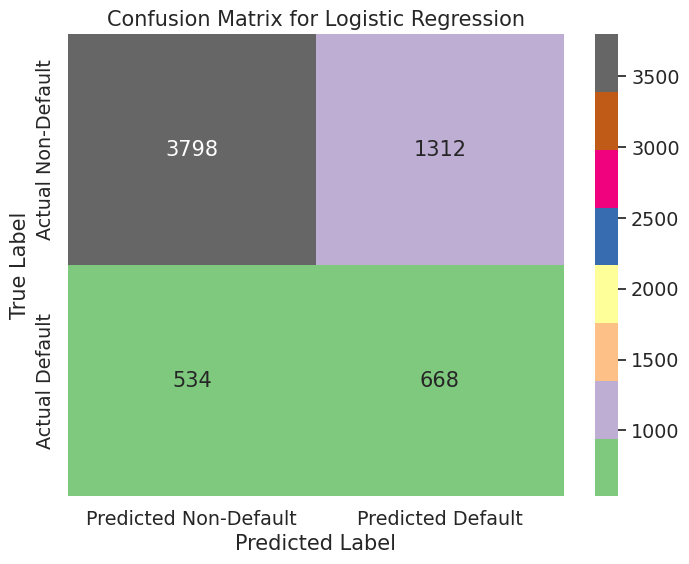

In [53]:
model_name = "Logistic Regression"
cm = results[model_name]['Confusion Matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Accent', cbar=True,
            xticklabels=['Predicted Non-Default', 'Predicted Default'],
            yticklabels=['Actual Non-Default', 'Actual Default'])
plt.title(f'Confusion Matrix for {model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [54]:
model_name = "Decision Tree"
model = models[model_name]
print(f"Training {model_name}...")
model.fit(X_train, y_train)
results[model_name] = evaluate_model(model, X_test, y_test)
for metric, value in results[model_name].items():
    print(f"{metric}: {value}")

Training Decision Tree...
Accuracy: 0.717680608365019
Precision: 0.3145780051150895
Recall: 0.40931780366056575
F1 Score: 0.3557483731019523
F2 Score: 0.3860640301318267
ROC AUC: 0.5997665339242163
Confusion Matrix: [[4038 1072]
 [ 710  492]]


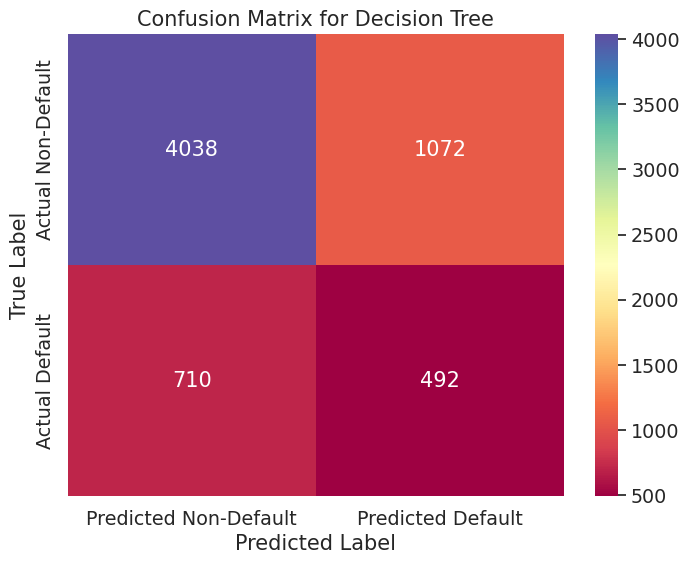

In [55]:
model_name = "Decision Tree"
cm = results[model_name]['Confusion Matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral', cbar=True,
            xticklabels=['Predicted Non-Default', 'Predicted Default'],
            yticklabels=['Actual Non-Default', 'Actual Default'],)
plt.title(f'Confusion Matrix for {model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [56]:
model_name = "XGBoost"
model = models[model_name]
print(f"Training {model_name}...")
model.fit(X_train, y_train)
results[model_name] = evaluate_model(model, X_test, y_test)

print(f"\n{model_name} Evaluation:")
for metric, value in results[model_name].items():
    print(f"{metric}: {value}")

Training XGBoost...

XGBoost Evaluation:
Accuracy: 0.8154309252217997
Precision: 0.5207166853303471
Recall: 0.38685524126455906
F1 Score: 0.4439140811455847
F2 Score: 0.4078231889142256
ROC AUC: 0.7475824701817908
Confusion Matrix: [[4682  428]
 [ 737  465]]


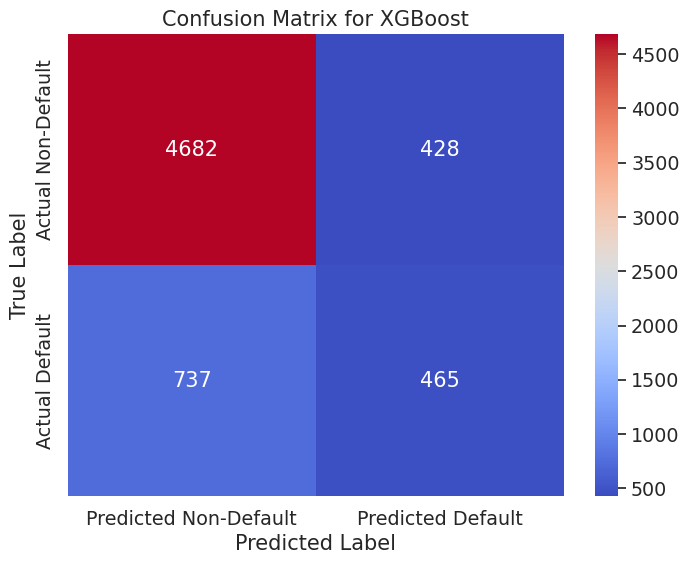

In [57]:
model_name = "XGBoost"
cm = results[model_name]['Confusion Matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True,
            xticklabels=['Predicted Non-Default', 'Predicted Default'],
            yticklabels=['Actual Non-Default', 'Actual Default'])
plt.title(f'Confusion Matrix for {model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [58]:
model_name = "LightGBM"
model = models[model_name]
print(f"Training {model_name}...")
model.fit(X_train, y_train)
results[model_name] = evaluate_model(model, X_test, y_test)
for metric, value in results[model_name].items():
    print(f"{metric}: {value}")

Training LightGBM...
[LightGBM] [Info] Number of positive: 15330, number of negative: 15330
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5180
[LightGBM] [Info] Number of data points in the train set: 30660, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.8266793409378961
Precision: 0.5652173913043478
Recall: 0.389351081530782
F1 Score: 0.46108374384236456
F2 Score: 0.4151880766501065
ROC AUC: 0.7683975826329894
Confusion Matrix: [[4750  360]
 [ 734  468]]


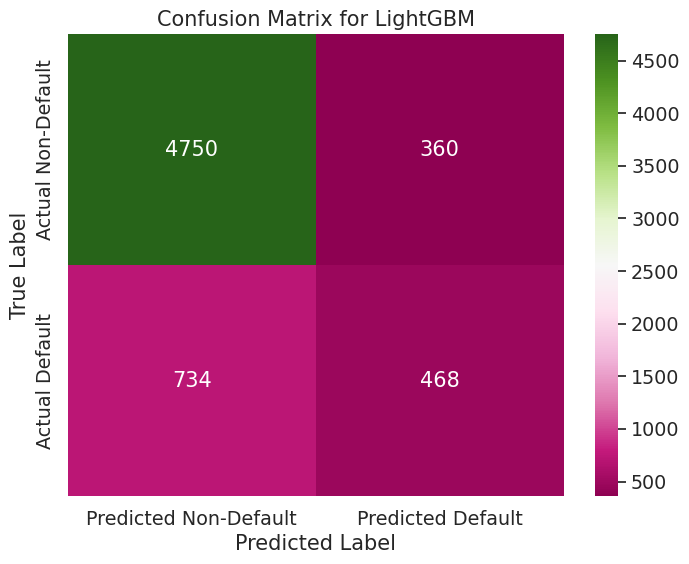

In [59]:
model_name = "LightGBM"
cm = results[model_name]['Confusion Matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='PiYG', cbar=True,
            xticklabels=['Predicted Non-Default', 'Predicted Default'],
            yticklabels=['Actual Non-Default', 'Actual Default'])
plt.title(f'Confusion Matrix for {model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [60]:
print("\n--- All Model Results ---")
for name, res in results.items():
  print(f"\n{name}:")
  for metric, value in res.items():
    if metric == 'Confusion Matrix':
      print(f"  {metric}:\n{value}")
    else:
      print(f"  {metric}: {value:.4f}")


--- All Model Results ---

Logistic Regression:
  Accuracy: 0.7075
  Precision: 0.3374
  Recall: 0.5557
  F1 Score: 0.4199
  F2 Score: 0.4920
  ROC AUC: 0.6908
  Confusion Matrix:
[[3798 1312]
 [ 534  668]]

Decision Tree:
  Accuracy: 0.7177
  Precision: 0.3146
  Recall: 0.4093
  F1 Score: 0.3557
  F2 Score: 0.3861
  ROC AUC: 0.5998
  Confusion Matrix:
[[4038 1072]
 [ 710  492]]

XGBoost:
  Accuracy: 0.8154
  Precision: 0.5207
  Recall: 0.3869
  F1 Score: 0.4439
  F2 Score: 0.4078
  ROC AUC: 0.7476
  Confusion Matrix:
[[4682  428]
 [ 737  465]]

LightGBM:
  Accuracy: 0.8267
  Precision: 0.5652
  Recall: 0.3894
  F1 Score: 0.4611
  F2 Score: 0.4152
  ROC AUC: 0.7684
  Confusion Matrix:
[[4750  360]
 [ 734  468]]



Model Comparison:
                     Accuracy Precision    Recall  F1 Score  F2 Score  \
Logistic Regression  0.707541  0.337374   0.55574  0.419862  0.492045   
Decision Tree        0.717681  0.314578  0.409318  0.355748  0.386064   
XGBoost              0.815431  0.520717  0.386855  0.443914  0.407823   
LightGBM             0.826679  0.565217  0.389351  0.461084  0.415188   

                      ROC AUC  
Logistic Regression  0.690838  
Decision Tree        0.599767  
XGBoost              0.747582  
LightGBM             0.768398  


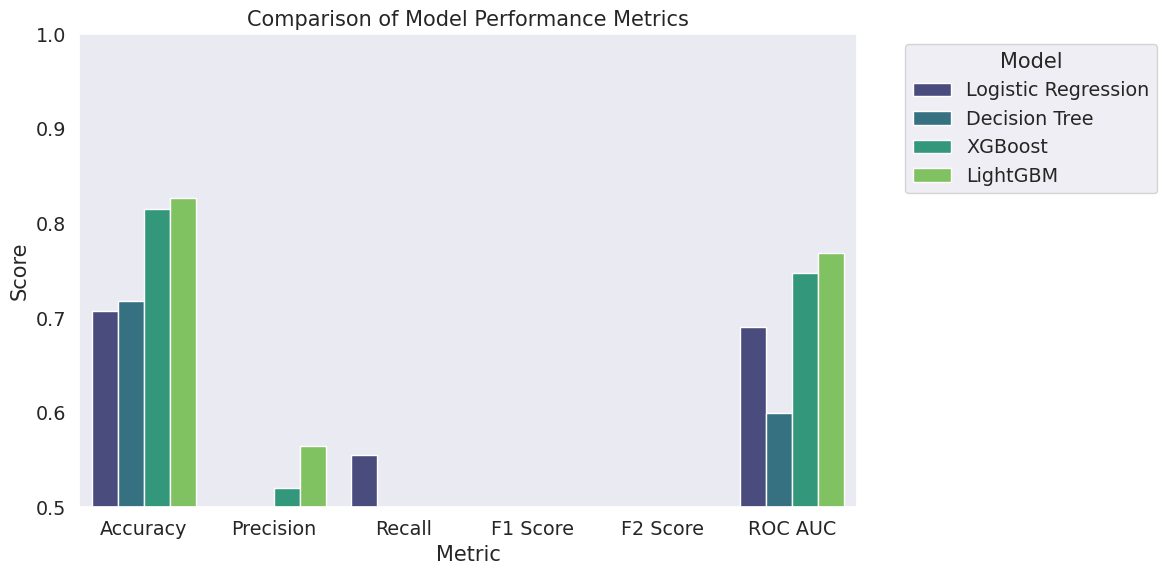

In [61]:
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score', 'ROC AUC']])


metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score','ROC AUC']
results_plot_df = results_df[metrics_to_plot].reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='index', data=results_plot_df, palette='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0.5, 1.0)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

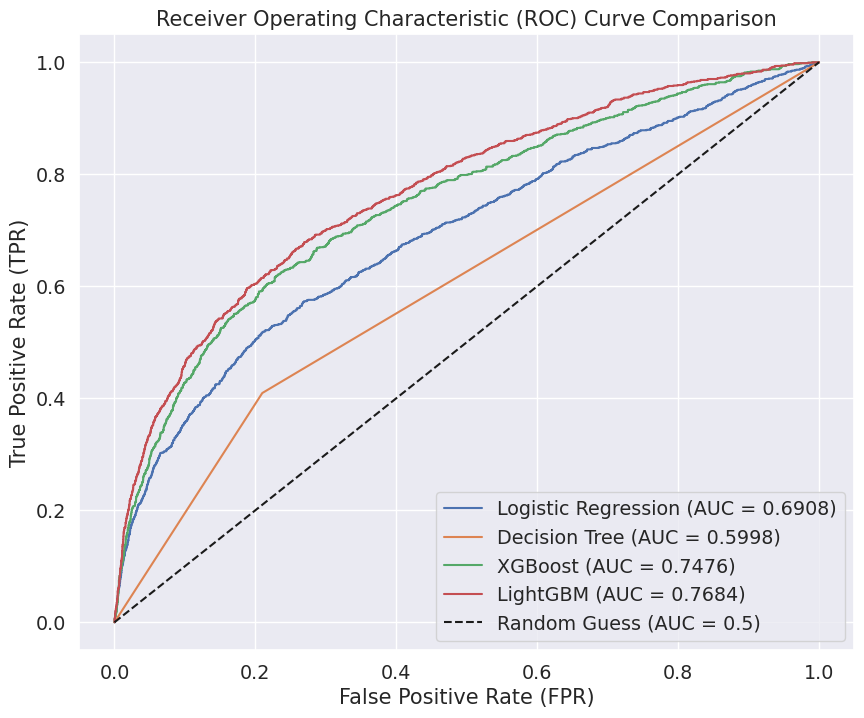

In [62]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
  y_pred_proba = model.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  auc = results[name]['ROC AUC']
  plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Threshold Tuning

In [63]:
from sklearn.metrics import confusion_matrix

best_thresholds = {}

for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    thresholds = np.arange(0, 1, 0.01)

    f2_scores = [fbeta_score(y_test, y_pred_proba >= t, beta=2) for t in thresholds]

    best_f2_score = max(f2_scores)
    best_thresh_index = np.argmax(f2_scores)
    best_thresh = thresholds[best_thresh_index]

    best_thresholds[name] = {
        'best_threshold': best_thresh,
        'best_f2_score': best_f2_score
    }


print("\n--- Best Threshold Results by F2 Score ---")
for name, data in best_thresholds.items():
    best_thresh = data['best_threshold']
    best_f2 = data['best_f2_score']

    y_pred_best_thresh = (models[name].predict_proba(X_test)[:, 1] >= best_thresh).astype(int)
    accuracy = accuracy_score(y_test, y_pred_best_thresh)
    precision = precision_score(y_test, y_pred_best_thresh)
    recall = recall_score(y_test, y_pred_best_thresh)
    f1 = f1_score(y_test, y_pred_best_thresh)
    roc_auc = roc_auc_score(y_test, models[name].predict_proba(X_test)[:, 1])
    cm = confusion_matrix(y_test, y_pred_best_thresh)


    print(f"\n{name} Results with Best Threshold ({best_thresh:.2f}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"F2 Score: {best_f2:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{cm}")


--- Best Threshold Results by F2 Score ---

Logistic Regression Results with Best Threshold (0.24):
Accuracy: 0.4271
Precision: 0.2284
Recall: 0.8444
F1 Score: 0.3595
F2 Score: 0.5485
ROC AUC: 0.6908
Confusion Matrix:
[[1681 3429]
 [ 187 1015]]

Decision Tree Results with Best Threshold (0.00):
Accuracy: 0.1904
Precision: 0.1904
Recall: 1.0000
F1 Score: 0.3199
F2 Score: 0.5405
ROC AUC: 0.5998
Confusion Matrix:
[[   0 5110]
 [   0 1202]]

XGBoost Results with Best Threshold (0.12):
Accuracy: 0.5876
Precision: 0.2860
Recall: 0.7787
F1 Score: 0.4183
F2 Score: 0.5791
ROC AUC: 0.7476
Confusion Matrix:
[[2773 2337]
 [ 266  936]]

LightGBM Results with Best Threshold (0.14):
Accuracy: 0.5612
Precision: 0.2800
Recall: 0.8303
F1 Score: 0.4188
F2 Score: 0.5960
ROC AUC: 0.7684
Confusion Matrix:
[[2544 2566]
 [ 204  998]]


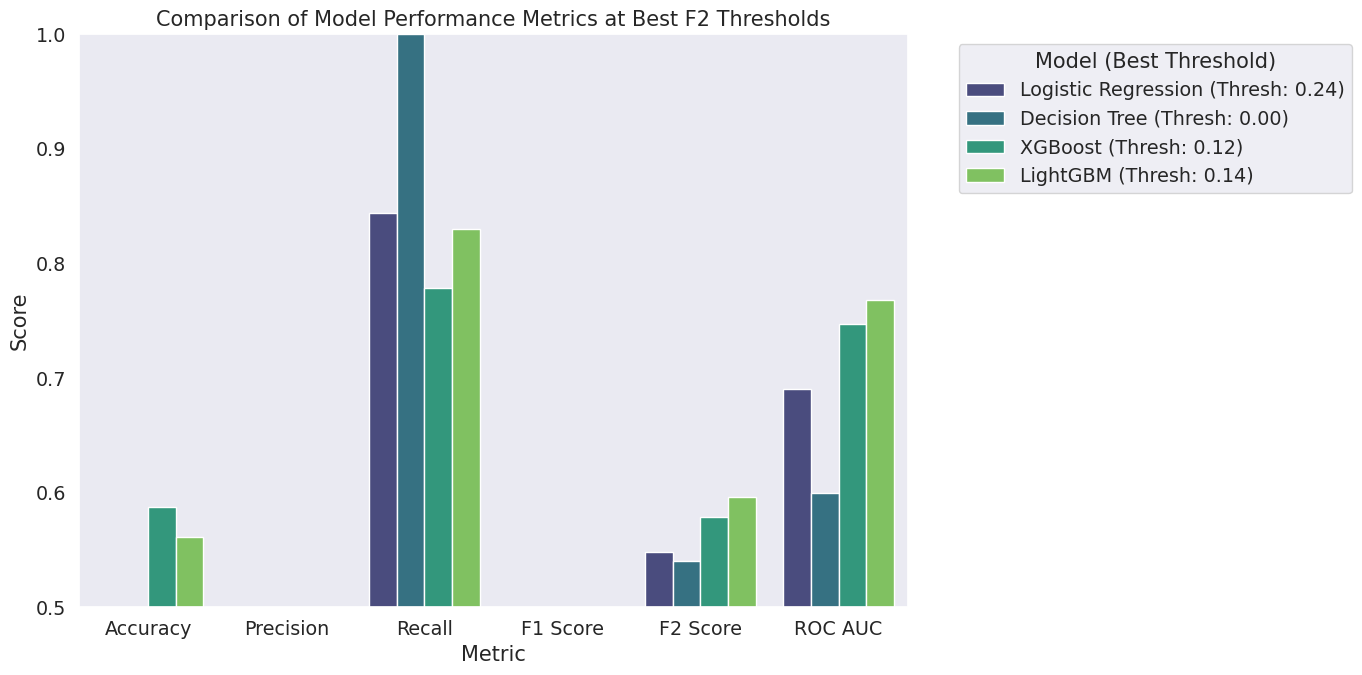

In [64]:
best_threshold_metrics = {}

for name, data in best_thresholds.items():
    best_thresh = data['best_threshold']
    y_pred_best_thresh = (models[name].predict_proba(X_test)[:, 1] >= best_thresh).astype(int)
    accuracy = accuracy_score(y_test, y_pred_best_thresh)
    precision = precision_score(y_test, y_pred_best_thresh)
    recall = recall_score(y_test, y_pred_best_thresh)
    f1 = f1_score(y_test, y_pred_best_thresh)
    f2 = fbeta_score(y_test, y_pred_best_thresh, beta=2)
    roc_auc = roc_auc_score(y_test, models[name].predict_proba(X_test)[:, 1])

    best_threshold_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'F2 Score': f2,
        'ROC AUC': roc_auc,
        'Threshold': best_thresh
    }

best_threshold_df = pd.DataFrame(best_threshold_metrics).T
best_threshold_df['Model'] = best_threshold_df.index

metrics_to_plot_best_thresh = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC AUC']
best_threshold_plot_df = best_threshold_df[metrics_to_plot_best_thresh + ['Model', 'Threshold']].melt(
    id_vars=['Model', 'Threshold'], var_name='Metric', value_name='Score'
)

plt.figure(figsize=(14, 7))
barplot = sns.barplot(x='Metric', y='Score', hue='Model', data=best_threshold_plot_df, palette='viridis')


plt.title('Comparison of Model Performance Metrics at Best F2 Thresholds')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0.5, 1.0)

handles, labels = barplot.get_legend_handles_labels()

custom_labels = [f"{label} (Thresh: {best_threshold_df.loc[label, 'Threshold']:.2f})" for label in labels]

plt.legend(handles, custom_labels, title='Model (Best Threshold)', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [65]:
chosen_model_name = "LightGBM"
chosen_model = models[chosen_model_name]

chosen_threshold = best_thresholds[chosen_model_name]['best_threshold']

print(f"Chosen Model: {chosen_model_name}")
print(f"Chosen Classification Threshold (Optimized for F2): {chosen_threshold:.2f}")
print(f"Best F2 Score: {best_thresholds[chosen_model_name]['best_f2_score']:.4f}")

Chosen Model: LightGBM
Chosen Classification Threshold (Optimized for F2): 0.14
Best F2 Score: 0.5960


In [66]:
validate['marriage'] = validate['marriage'].replace(0, 3)
validate['education'] = validate['education'].replace([0, 5, 6], 4)

validate['pay_mean'] = validate[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']].mean(axis=1)
validate['Bill_amt_mean'] = validate[['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']].mean(axis=1)
validate['pay_amt_mean'] = validate[['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].mean(axis=1)
validate['credit_utilization'] = validate['AVG_Bill_amt'] / validate['LIMIT_BAL']

feature_cols = X_train.columns

In [67]:
feature_cols

Index(['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'pay_mean', 'Bill_amt_mean',
       'pay_amt_mean', 'credit_utilization'],
      dtype='object')

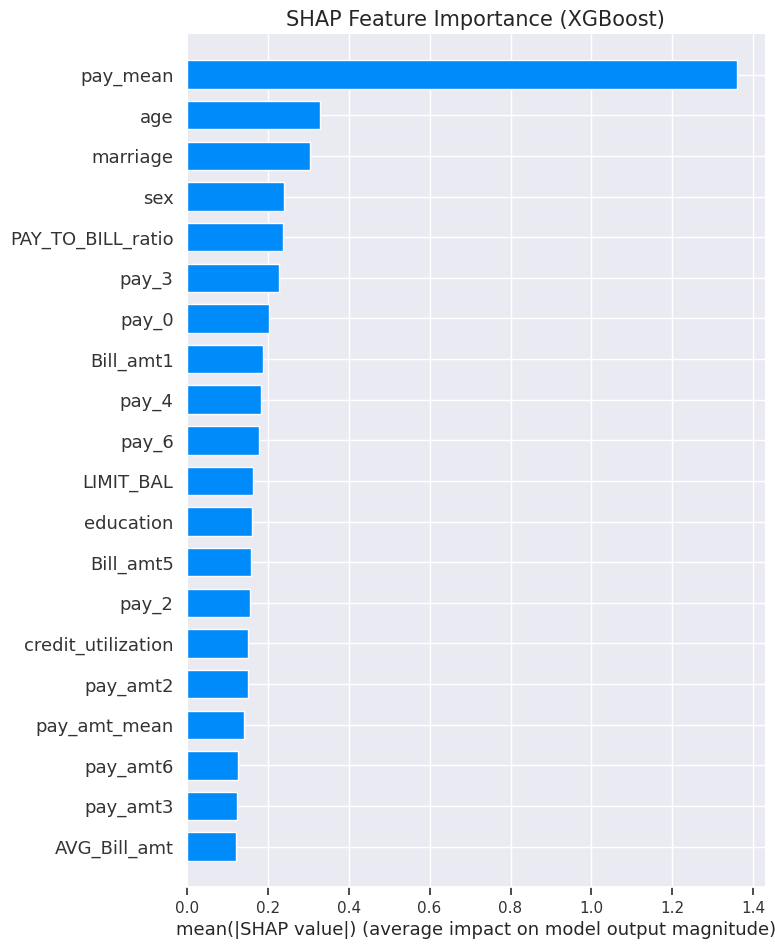

In [68]:
import shap

explainer = shap.TreeExplainer(xgboost)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (XGBoost)")
plt.show()

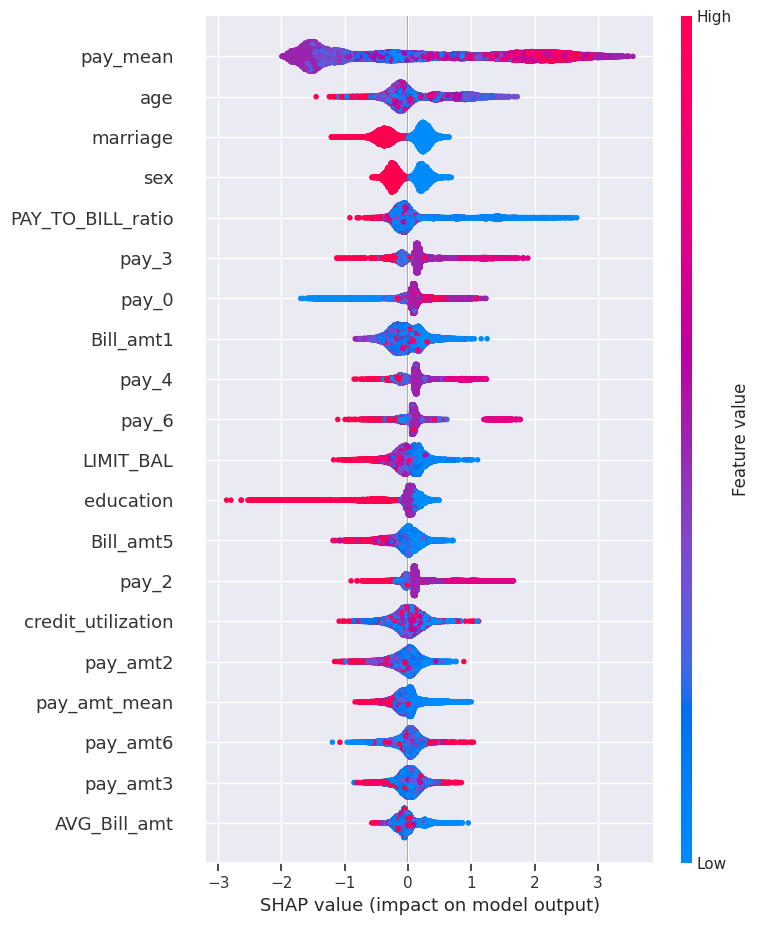

In [69]:
shap.summary_plot(shap_values, X_train)

In [70]:
X_validate = validate[feature_cols]

X_validate_scaled = scaler.transform(X_validate)

validate_pred_proba = chosen_model.predict_proba(X_validate_scaled)[:, 1]

validate_predictions = (validate_pred_proba >= chosen_threshold).astype(int)

predictions_df = pd.DataFrame({
    'Customer': validate['Customer_ID'],
    'next_month_default': validate_predictions
})

print("\nProduction-style predictions on validation dataset:")
print(predictions_df.head())


Production-style predictions on validation dataset:
   Customer  next_month_default
0         1                   0
1         2                   0
2         3                   0
3         4                   1
4         5                   0


In [71]:
predictions_df.to_csv('submission_23323020.csv', index=False)